# BtcUsdt Price Prediction Based on Twitter Messages Sentiment Analysis Model Development


**Objective:**
- BTC price prediction based on tweets' sentimental scores and develop trade strategies

Twitter Dataset : https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets?select=Bitcoin_tweets_dataset_2.csv
Btc Historical data : Binance API.

## Methodology:

#### 1. Preprocessing : Cleaning & Text Normalization for NLP:
**Lovercase whole tweets**
**Cleaning :**
- remove emojis
- remove links
- remove hashtag sign
- remove 3dots
- remove "rt @"
- remove mentiones
- remove "rt &"data = re.sub(rt_and_patters," ",str(data)) 
- remove "\n"
- fix contractions Can't = cannot
- remove punctuations
- remove digits
**Tokenization & Text Normalizations
- Word Tokens
- Stemming
- Lemmatization
- Remove Stopwords

#### 2. Feature Creation:
- Calculated houry tweet volume database
- BTC historical data merging

#### 3 Sentiment Analysis by TextBlob:
- Subjectivity Score
- Polarity Score
- Created Sentimens (Positive/Neutral/Negative)
- Calculated Sentiment scores with Subjectivity, tweet volume

#### 4. Explorative Data Analysis:
- Checking for Null values
- Checking for outliers
- Chacking for cross corralation

#### 5. Feature Importance: 
Sklearn Libraries
- Mutual_info_regression 
- F_regression
- Random Forest Feature Importance
- RFE(Random Forest )

#### 5. Processed Final Data for Machine Learning:
- Timeseries DataFrame with selected features
Processed data is trained with random forest regression model and cross validated with Random Grid Search and Grid Search methodologies for tuning.

**Methodology:**

    1. Random Forest Estimator
        - Multiple Feature
        - Sentiment Score
        - Model Evauation
        
    2. Random Grid Saerch
        - Get best params
        - Model Evaluation
    - Grid Search
        - Use Random Search best params
        - Get Best params
        - Model Evaluation
        
**Conclusion** : After evaluating with different paramaters, accuracy rates didn't increas significantly. On the other hand, when same dataframe is trained based on only "sentiment_score" feature, gives much more accuracy rate.


                         Accuracy
Full data simple RFG--------86.651112\
Full data RFG + RB----------86.687147\
Full data RFG+RB+GS---------86.704498\
Single Feature RFG----------95.930713\
Single Feature RFG+RB-------95.935596


**Further study;**

- Text Normalization with bag of word specific for cryptocurrency
- Bigger size of twitter data
- Further LSTM(Long short-term memory) sentiment analysis.
- Real data set validation


In [7]:
# Import Libraries
import pandas as pd
import numpy as np

import re #used for find and resplace regex expressions
import string #used for get rid of punctuations
import time
import datetime

import contractions
from collections import Counter,OrderedDict

from langdetect import detect # to detect non-english tweets

# NLTK modules necessary for processing data for sentimental analysis
import nltk #used for word tokenizing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.util import ngrams
nltk.download('punkt')
nltk.download('wordnet')
stop_words= set(stopwords.words('english'))
stop_words.remove('not')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud


# correction text tools
from textblob import TextBlob
from spellchecker import SpellChecker

#changing data type from object to ....
from ast import literal_eval



from tqdm.notebook import tqdm
tqdm.pandas()

""" ignoring warnings """
from warnings import filterwarnings
filterwarnings('ignore')

"""This will set the no truncate for Pandas as well as for Dask. 
I am not sure how it does for Dask though, but it works."""

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
#pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ozan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ozan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Twitter Data 

In [8]:
# path for data folder
file = '<folder path>'

#List of all the documents in the folder:
!ls C:\\Users\\Ozan\\Desktop\\DS\\PostgreSQLPython\\Notebook\\data

#btc_twitter_data_10
#deprem  since
#deprem OR #enkazaltindayiz  since
#deprem OR #enkazaltindayiz  since_time
#deprem OR #enkazaltindayiz  until
#deprem OR #enkazaltindayiz  until_time
#deprem OR #enkazaltindayiz_twitter_data_10
#deprem until_time=1675645855 since_time
#deprem_twitter_data_10
#python_twitter_data_10
#rifathisarciklioglu.csv
#rifathisarciklioglu_twitter_data_10
#tobb.csv
(#deprem OR #enkazaltÄ±ndayÄ±m) until_time=1675645855 since_time
(#deprem OR #enkazaltÄ±ndayÄ±m) until_time={1675645855} since_time
+#polkadot OR #dot_4000
100000_tweets.csv
100000_tweets.xlsx
Bitcoin_tweets.csv.zip
Bitcoin_tweets_dataset_2.csv.zip
Bitcoin_tweets_dataset_2.csv~
Bitcoin_tweets_dataset_2_val.csv
Bitcoin_weets.csv
ML_tweet_feature_Selected_data.csv
Tweet_and_BTC_merged_data.csv
Tweet_and_BTC_merged_data_w_scores.csv
_#polkadot_4000
all_polkadot.csv
btc_03062023.csv
btc_1d_20230206_20230214
btc_1h_20210205_20210624.csv
btc_1h_20210205_20210624_full.csv
btc_1h_2021029_20210623
btc_1h_202302

In [593]:
#load first 200.000 rows from the data

df = pd.read_csv(file+'data_bitcoin_tweets.csv', parse_dates= ['date'], nrows= 200000)

In [594]:
print("Raw data size : " , df.shape)
print("Raw data information : ",(df.info()))

Raw data size :  (200000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         199997 non-null  object 
 1   user_location     110156 non-null  object 
 2   user_description  184063 non-null  object 
 3   user_created      200000 non-null  object 
 4   user_followers    200000 non-null  float64
 5   user_friends      200000 non-null  object 
 6   user_favourites   200000 non-null  object 
 7   user_verified     200000 non-null  object 
 8   date              200000 non-null  object 
 9   text              200000 non-null  object 
 10  hashtags          183251 non-null  object 
 11  source            196683 non-null  object 
 12  is_retweet        199997 non-null  object 
dtypes: float64(1), object(12)
memory usage: 19.8+ MB
Raw data information :  None


In [8]:
# Filter features from raw data 

df_text= df[['date', 'text']]
df_text = pd.DataFrame(df_text)

In [78]:
df_text.head()

,date,text
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...


In [79]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    200000 non-null  object
 1   text    200000 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [599]:
df_tweet = df_text.copy()

In [600]:
# check for empty cells
df_tweet.isnull().sum()

date    0
text    0
dtype: int64

In [596]:
# Query some properties of the data
print('Dimensionality of the data is {}'.format(df_tweet.shape))  # .shape returns a tupel
print('The data set has {} cases.'.format(df_tweet.shape[0]))     # we can also index the elements of that tupel
print('The total number of elements is {}.'.format(df_tweet.size))

Dimensionality of the data is (200000, 7)
The data set has 200000 cases.
The total number of elements is 1400000.


In [605]:
df_tweet.rename(columns = {'text':'tweet'}, inplace = True)

In [606]:
df_tweet.head()

,date,tweet
0,2021-02-10 23:59:04,blue ridge bank shares halted by nyse after #b...
1,2021-02-10 23:58:48,"😎 today, that's this #thursday, we will do a ""..."
2,2021-02-10 23:54:48,"guys evening, i have read this article about b..."
3,2021-02-10 23:54:33,$btc a big chance in a billion! price: \487264...
4,2021-02-10 23:54:06,this network is secured by 9 508 nodes as of t...


# 1. Cleaning & Text Normalization for NLP:
First, by using NLP techniques, the text has been cleaned, parsed, and removed all the
stopwords, hashtags, links, and other unnecessary information, have been applied on
it in order to get a plain text which contains only the most important tokens for the ML
classifier, and a text with less capacity required

In [609]:
# Text lowercase 
df_tweet['tweet'] = df_tweet['tweet'].str.lower()

# Change date column type into datetime
#df_tweet['date'] = pd.to_datetime(df_tweet['date'])

### 1.1 Cleaning

- #### Patterns for  subtractions:

In [610]:

# https://en.wikipedia.org/wiki/Unicode_block
emoji_pattern = re.compile(
    "["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251" 
    "]+"
)

tag_pattern = re.compile("(?:\#)\S+") #hashtag pattern

rt_mention_pattern = re.compile("rt @[A-Za-z0-9_:]+") #rt @ pattern

mentioned_pattern = re.compile("(?:\@)\S+") # @mention pattern

links_pattern = re.compile("http\S+|www\S+|https\S+") #http/https etc. pattern

digits_pattern = re.compile("\w*\d+\w*") #removes all numbers 

rt_and_pattern= re.compile("rt &[A-Za-z0-9_;]+") #removes "rt &"" pattern 


- #### Cleaning function: 
    Returns clean tweets, free from emojis, hastags,mentions,punctiotions,digits + fixed contractions

In [611]:
translator = str.maketrans(" "," ",string.punctuation)
start= time.time()
def cleaning_tweet(data):
    data = re.sub(emoji_pattern," ",str(data))             # remove emojis
    data = re.sub(links_pattern," ",str(data))             # remove links
    data = str(data).replace("#","")                        # remove hashtag sign
    data = str(data).replace("...","")                        # remove 3dots
    data = re.sub(rt_mention_pattern," ",str(data))        # remove "rt @"
    data = re.sub(mentioned_pattern," ",str(data))         # remove mentiones
    data = re.sub(rt_and_pattern," ",str(data))            # remove "rt &"data = re.sub(rt_and_patters," ",str(data)) 
    data = str(data).replace("\n"," ")                     # remove "\n"
    data = contractions.fix(data)                          #fix contractions Can't = cannot
    data = data.translate(translator)                      # remove punctuations
    data = " ".join([w for w in data.split() if not w.isdigit()]) # remove digits
    return data
    
df_tweet['clean_tweet'] = df_tweet['tweet'].apply(lambda x: cleaning_tweet(x))                 
end = time.time()
print("Cleaning tweet process: ", end-start)

Cleaning tweet process:  9.200219631195068


In [612]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         200000 non-null  object
 1   tweet        200000 non-null  object
 2   clean_tweet  200000 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB


In [89]:
df_tweet.head(3)

,date,tweet,clean_tweet
0,2021-02-10 23:59:04,blue ridge bank shares halted by nyse after #b...,blue ridge bank shares halted by nyse after bi...
1,2021-02-10 23:58:48,"😎 today, that's this #thursday, we will do a ""...",today that is this thursday we will do a take ...
2,2021-02-10 23:54:48,"guys evening, i have read this article about b...",guys evening i have read this article about bt...


### 1.2 Text Normalization:

- #### Tokenization : Creates word tokens from clean text

In [613]:

start= time.time()
df_tweet['tokens'] = df_tweet['clean_tweet'].apply(word_tokenize)
df_tweet.sample(3)
end = time.time()

print("tokenization process: ", end-start)
df_tweet.sample(2)

tokenization process:  27.641184329986572


,date,tweet,clean_tweet,tokens
150778,2021-06-23 05:48:16,the worst time to sell #cryptocurrency is dur...,the worst time to sell cryptocurrency is durin...,"[the, worst, time, to, sell, cryptocurrency, i..."
135146,2021-06-23 15:42:31,1 of the most important interview in human his...,of the most important interview in human histo...,"[of, the, most, important, interview, in, huma..."


- #### Stemming:

In [614]:
start= time.time()

ps = PorterStemmer()
df_tweet['stemmed'] = df_tweet['tokens'].apply(lambda x: [ps.stem(w) for w in x])

end = time.time()

print("stemming process: ", end-start)
df_tweet.sample(2)

stemming process:  72.95987868309021


,date,tweet,clean_tweet,tokens,stemmed
33159,2021-02-19 20:53:12,$btc #btc #bitcoin $tsla \n#tesla made more pr...,btc btc bitcoin tsla tesla made more profit fr...,"[btc, btc, bitcoin, tsla, tesla, made, more, p...","[btc, btc, bitcoin, tsla, tesla, made, more, p..."
81678,2021-04-23 07:16:52,today #dogearmy we rise like the #darkphoenix ...,today dogearmy we rise like the darkphoenix do...,"[today, dogearmy, we, rise, like, the, darkpho...","[today, dogearmi, we, rise, like, the, darkpho..."


- #### Lemmatization:

In [615]:


start= time.time()

lem= WordNetLemmatizer()
df_tweet['lemmatized'] = df_tweet['tokens'].apply(lambda x: [lem.lemmatize(w) for w in x])

end = time.time()
print("Lemmatizing process: ", end-start) 
df_tweet.sample(2)

Lemmatizing process:  17.7618670463562


,date,tweet,clean_tweet,tokens,stemmed,lemmatized
178190,2021-06-22 14:11:08,$btc following below price roadmap that is goi...,btc following below price roadmap that is goin...,"[btc, following, below, price, roadmap, that, ...","[btc, follow, below, price, roadmap, that, is,...","[btc, following, below, price, roadmap, that, ..."
178996,2021-06-22 13:57:33,bitcoin 2021 roi nearly wiped out after worst ...,bitcoin roi nearly wiped out after worst quart...,"[bitcoin, roi, nearly, wiped, out, after, wors...","[bitcoin, roi, nearli, wipe, out, after, worst...","[bitcoin, roi, nearly, wiped, out, after, wors..."


- #### Removing Stopwords:

In [616]:
#Remove stopwords

start = time.time()

df_tweet['normalized_tokens'] = df_tweet['lemmatized'].apply(lambda x :" ".join ([word for word in x if word not in stop_words]))

end = time.time()
print(end-start)    


df_tweet.sample(3)


0.5435605049133301


,date,tweet,clean_tweet,tokens,stemmed,lemmatized,normalized_tokens
190748,2021-06-22 09:09:06,@dudejlebowski add good news like @atlashodl c...,add good news like cousins birthday bitcoin ad...,"[add, good, news, like, cousins, birthday, bit...","[add, good, news, like, cousin, birthday, bitc...","[add, good, news, like, cousin, birthday, bitc...",add good news like cousin birthday bitcoin adr...
146193,2021-06-23 09:26:15,"in an exponential world, risk doesn't equal re...",in an exponential world risk does not equal re...,"[in, an, exponential, world, risk, does, not, ...","[in, an, exponenti, world, risk, doe, not, equ...","[in, an, exponential, world, risk, doe, not, e...",exponential world risk doe not equal reward bi...
64825,2021-04-07 17:05:54,#bitcoin went down....\neverything dying like ...,bitcoin went down everything dying like fish w...,"[bitcoin, went, down, everything, dying, like,...","[bitcoin, went, down, everyth, die, like, fish...","[bitcoin, went, down, everything, dying, like,...",bitcoin went everything dying like fish whitou...


#### - Save clean tweet

In [94]:
df_tweet.to_csv(file+'clean_tweet_kaggledataset.csv',index = False)

In [97]:
df = pd.read_csv(file+'clean_tweet_kaggledataset.csv')
clean_tweet = df.copy()
clean_tweet.head(2)

,date,tweet,clean_tweet,tokens,stemmed,lemmatized,normalized_tokens
0,2021-02-10 23:59:04,blue ridge bank shares halted by nyse after #b...,blue ridge bank shares halted by nyse after bi...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...","['blue', 'ridg', 'bank', 'share', 'halt', 'by'...","['blue', 'ridge', 'bank', 'share', 'halted', '...",blue ridge bank share halted nyse bitcoin atm ...
1,2021-02-10 23:58:48,"😎 today, that's this #thursday, we will do a ""...",today that is this thursday we will do a take ...,"['today', 'that', 'is', 'this', 'thursday', 'w...","['today', 'that', 'is', 'thi', 'thursday', 'we...","['today', 'that', 'is', 'this', 'thursday', 'w...",today thursday take friend btc wallet security...


- #### Filter Non-English tweets

In [617]:
# function for language detection will be applied to all tweets

from langdetect import detect
lang = []
sentence = ''
def find_lang(data):
    try:
        sentence = detect(data)
    except:
        sentence = 'unknown'
    return sentence
start = time.time()
clean_tweet['lang'] = clean_tweet['tweet'].apply(lambda x: find_lang(x))
end = time.time()

print("language detection process: ", end-start)

language detection process:  1190.9231989383698


In [618]:
clean_tweet.to_csv(file+'clean_tweet_lan_kaggledataset.csv',index = False)
clean_tweet = pd.read_csv(file+'clean_tweet_lan_kaggledataset.csv')
clean_tweet_lang = clean_tweet.copy()
clean_tweet_lang.head(2)

,date,tweet,clean_tweet,tokens,stemmed,lemmatized,normalized_tokens,lang
0,2021-02-10 23:59:04,blue ridge bank shares halted by nyse after #b...,blue ridge bank shares halted by nyse after bi...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...","['blue', 'ridg', 'bank', 'share', 'halt', 'by'...","['blue', 'ridge', 'bank', 'share', 'halted', '...",blue ridge bank share halted nyse bitcoin atm ...,en
1,2021-02-10 23:58:48,"😎 today, that's this #thursday, we will do a ""...",today that is this thursday we will do a take ...,"['today', 'that', 'is', 'this', 'thursday', 'w...","['today', 'that', 'is', 'thi', 'thursday', 'we...","['today', 'that', 'is', 'this', 'thursday', 'w...",today thursday take friend btc wallet security...,en


In [620]:
clean_tweet_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   date               200000 non-null  object
 1   tweet              200000 non-null  object
 2   clean_tweet        199927 non-null  object
 3   tokens             200000 non-null  object
 4   stemmed            200000 non-null  object
 5   lemmatized         200000 non-null  object
 6   normalized_tokens  199927 non-null  object
 7   lang               200000 non-null  object
dtypes: object(8)
memory usage: 12.2+ MB


### - Drop empty tokens

In [621]:
clean_tweet_lang = clean_tweet_lang.dropna(subset='normalized_tokens')

In [622]:
clean_tweet_lang[clean_tweet_lang.normalized_tokens.isnull()]

,date,tweet,clean_tweet,tokens,stemmed,lemmatized,normalized_tokens,lang


### - Top 10 tweet languages

In [639]:
clean_tweet.lang.value_counts()[:9]

en    196401
fr      1056
it       360
ca       354
nl       348
ro       309
tl       140
es       132
cy       113
Name: lang, dtype: int64

### - Filter only english tweets

In [647]:
df_clean_filtered_tweet = clean_tweet_lang[clean_tweet_lang['lang']=='en']

In [653]:
df_clean_filtered_tweet.head(2)

,date,tweet,clean_tweet,tokens,stemmed,lemmatized,normalized_tokens,lang
0,2021-02-10 23:59:04,blue ridge bank shares halted by nyse after #b...,blue ridge bank shares halted by nyse after bi...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...","['blue', 'ridg', 'bank', 'share', 'halt', 'by'...","['blue', 'ridge', 'bank', 'share', 'halted', '...",blue ridge bank share halted nyse bitcoin atm ...,en
1,2021-02-10 23:58:48,"😎 today, that's this #thursday, we will do a ""...",today that is this thursday we will do a take ...,"['today', 'that', 'is', 'this', 'thursday', 'w...","['today', 'that', 'is', 'thi', 'thursday', 'we...","['today', 'that', 'is', 'this', 'thursday', 'w...",today thursday take friend btc wallet security...,en


In [ ]:
df_clean_filtered_tweet.to_csv(file+'clean_tweet_eng_kaggledataset.csv',index = False)

In [657]:
clean_tweet_en = df_clean_filtered_tweet.copy()
clean_tweet_en = clean_tweet_en.drop(['tweet', 'clean_tweet', 'tokens', 'stemmed', 'lemmatized','lang'], axis=1)
clean_tweet_en.head(2)

,date,normalized_tokens
0,2021-02-10 23:59:04,blue ridge bank share halted nyse bitcoin atm ...
1,2021-02-10 23:58:48,today thursday take friend btc wallet security...


In [659]:
print("Processed english tweet data size : ", len(clean_tweet_en))

Processed english tweet data size :  196334


# 2. Sentiment Analysis:

Tweets sentiment analysis will be performed with unsupervised learning model Textblob. Polarity (-1,1) and Subjectivity (0,1) scores will be created for each normalized_token tweets

*The deep learning NLP Bert model is also considered to use for sentiment analysis however was not performed in this study due to slower processing power

In [660]:
#TEXT BLOB

#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create a function to get sentiments based on polarity score

def getSentiments(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

start= time.time()
#Text_Blob subjectivity score    
clean_tweet_en['subjectivity'] = clean_tweet_en['normalized_tokens'].apply(lambda x: getSubjectivity(x)) #
#Text_Blob polarity score
clean_tweet_en['polarity'] = clean_tweet_en['normalized_tokens'].apply(getPolarity)
#Sentiments based on polarity score
clean_tweet_en['sentiments'] = clean_tweet_en['polarity'].apply(getSentiments )
end = time.time()
print("Sentiment Analysis pocess :", end-start)
clean_tweet_en.sample(3)

Sentiment Analysis pocess : 57.51049876213074


,date,normalized_tokens,subjectivity,polarity,sentiments
165362,2021-06-22 18:55:28,household set chart new path money luxury entr...,0.401515,0.270455,Positive
182946,2021-06-22 12:54:27,wish could buy telcoin directly app already ge...,0.400000,0.100000,Positive
112635,2021-05-28 17:21:17,us30 ftmo trade week take profit stop loss bit...,0.575000,0.225000,Positive


In [661]:
df_tweet_sentiments = clean_tweet_en.copy()

#### - Save normalized english tokens data

In [662]:
clean_tweet_en.to_csv(file+'clean_tweet_eng_sentiments_kaggledataset.csv',index = False)
df_tweet_sentiments = pd.read_csv(file+'clean_tweet_eng_sentiments_kaggledataset.csv')
processed_tweet = df_tweet_sentiments.copy()
processed_tweet.head(2)

,date,normalized_tokens,subjectivity,polarity,sentiments
0,2021-02-10 23:59:04,blue ridge bank share halted nyse bitcoin atm ...,0.1,0.0,Neutral
1,2021-02-10 23:58:48,today thursday take friend btc wallet security...,0.0,0.0,Neutral


#### - Distribution of sentiments

In [663]:
processed_tweet.sentiments.value_counts()

Neutral     87732
Positive    84728
Negative    23874
Name: sentiments, dtype: int64

<BarContainer object of 3 artists>

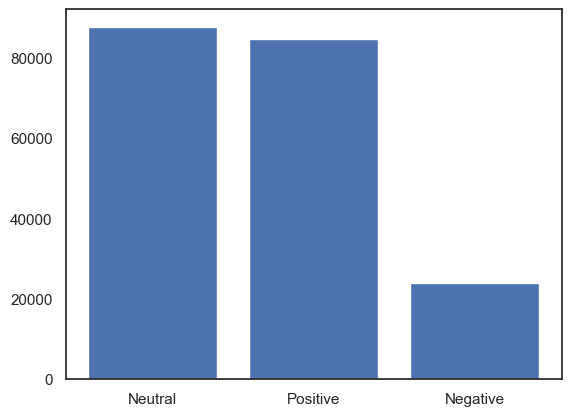

In [664]:
plt.bar(processed_tweet.sentiments.value_counts().index,processed_tweet.sentiments.value_counts())

In [665]:
processed_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196334 entries, 0 to 196333
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               196334 non-null  object 
 1   normalized_tokens  196334 non-null  object 
 2   subjectivity       196334 non-null  float64
 3   polarity           196334 non-null  float64
 4   sentiments         196334 non-null  object 
dtypes: float64(2), object(3)
memory usage: 7.5+ MB


In [701]:
tweet_score = processed_tweet.copy()
tweet_score.head()

,date,normalized_tokens,subjectivity,polarity,sentiments
0,2021-02-10 23:59:04,blue ridge bank share halted nyse bitcoin atm ...,0.1,0.0,Neutral
1,2021-02-10 23:58:48,today thursday take friend btc wallet security...,0.0,0.0,Neutral
2,2021-02-10 23:54:48,guy evening read article btc would like share,0.0,0.0,Neutral
3,2021-02-10 23:54:33,btc big chance billion price bitcoin fx btc cr...,0.1,0.0,Neutral
4,2021-02-10 23:54:06,network secured node today soon biggest bear r...,0.1,0.0,Neutral


### - Summary statistics for numerical variables

In [702]:
tweet_score.describe()

,subjectivity,polarity
count,196334.000000,196334.000000
mean,0.317371,0.109921
std,0.310849,0.244809
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.300000,0.000000
75%,0.537500,0.214286
max,1.000000,1.000000


- Drop str object from date column to set as datetime object

In [703]:
tweet_score.date.sort_values(ascending=False)

134580    ['cryptocurrency', 'BSC', 'Bitcoin', 'Ethereum...
177249    ['YieldFarming', 'Airdrop', 'Binance', 'Bitcoi...
63273                             ['ETH', 'BTC', 'Bitcoin']
126064                                  2021-06-23 19:29:37
126065                                  2021-06-23 19:29:35
                                ...                        
20927                                   2021-02-05 10:52:26
20928                                   2021-02-05 10:52:07
20929                                   2021-02-05 10:52:06
20930                                   2021-02-05 10:52:04
20931                                   2021-02-05 10:52:04
Name: date, Length: 196334, dtype: object

In [704]:
tweet_score = tweet_score.drop(index=[134580,177249,63273])

In [705]:
tweet_score['datetime'] = pd.to_datetime(tweet_score['date'])
tweet_score = tweet_score.sort_values(by= 'datetime', ascending= False)
tweet_score['datetime'] = tweet_score['datetime'].dt.floor('h')
tweet_score.head(2)

,date,normalized_tokens,subjectivity,polarity,sentiments,datetime
126064,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive,2021-06-23 19:00:00
126065,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive,2021-06-23 19:00:00


### - Hourly Tweet Sentiment Summary

In [711]:
tweet_score_statistics = tweet_score.groupby('datetime').describe()
tweet_score_statistics

subjectivity                                          \
                           count      mean       std  min  25%       50%   
datetime                                                                   
2021-02-05 10:00:00         10.0  0.131667  0.300046  0.0  0.0  0.000000   
2021-02-05 11:00:00         85.0  0.255115  0.319960  0.0  0.0  0.000000   
2021-02-05 12:00:00        135.0  0.284652  0.310698  0.0  0.0  0.200000   
2021-02-05 13:00:00        129.0  0.252204  0.320145  0.0  0.0  0.000000   
2021-02-05 14:00:00        157.0  0.290694  0.314682  0.0  0.0  0.250000   
...                          ...       ...       ...  ...  ...       ...   
2021-06-23 15:00:00       2225.0  0.307485  0.309851  0.0  0.0  0.280000   
2021-06-23 16:00:00       1948.0  0.302982  0.315633  0.0  0.0  0.250000   
2021-06-23 17:00:00       1628.0  0.334421  0.315399  0.0  0.0  0.333333   
2021-06-23 18:00:00       1607.0  0.339030  0.319298  0.0  0.0  0.345238   
2021-06-23 19:00:00        811.0  0.352654  0.304713  0.0  0.0  0.400000   

                                   polarity                                 \
                          75%  max    count      mean       std   min  25%   
datetime                                                                     
2021-02-05 10:00:00  0.000000  0.9     10.0  0.095000  0.208766  0.00  0.0   
2021-02-05 11:00:00  0.475000  1.0     85.0  0.064736  0.176372 -0.35  0.0   
2021-02-05 12:00:00  0.500000  1.0    135.0  0.107199  0.271683 -1.00  0.0   
2021-02-05 13:00:00  0.500000  1.0    129.0  0.090313  0.249827 -1.00  0.0   
2021-02-05 14:00:00  0.500000  1.0    157.0  0.120740  0.231454 -0.50  0.0   
...                       ...  ...      ...       ...       ...   ...  ...   
2021-06-23 15:00:00  0.562500  1.0   2225.0  0.156344  0.285400 -1.00  0.0   
2021-06-23 16:00:00  0.550000  1.0   1948.0  0.150479  0.279311 -1.00  0.0   
2021-06-23 17:00:00  0.600000  1.0   1628.0  0.161362  0.272570 -1.00  0.0   
2021-06-23 18:00:00  0.600000  1.0   1607.0  0.149464  0.288609 -1.00  0.0   
2021-06-23 19:00:00  0.583333  1.0    811.0  0.158792  0.284458 -1.00  0.0   

                                         
                     50%       75%  max  
datetime                                 
2021-02-05 10:00:00  0.0  0.000000  0.6  
2021-02-05 11:00:00  0.0  0.080000  0.6  
2021-02-05 12:00:00  0.0  0.215476  1.0  
2021-02-05 13:00:00  0.0  0.136364  1.0  
2021-02-05 14:00:00  0.0  0.285714  1.0  
...                  ...       ...  ...  
2021-06-23 15:00:00  0.0  0.318182  1.0  
2021-06-23 16:00:00  0.0  0.300000  1.0  
2021-06-23 17:00:00  0.0  0.300000  1.0  
2021-06-23 18:00:00  0.0  0.294375  1.0  
2021-06-23 19:00:00  0.0  0.348214  1.0  

[775 rows x 16 columns]

In [709]:
tweet_score.head()

,date,normalized_tokens,subjectivity,polarity,sentiments,datetime
126064,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive,2021-06-23 19:00:00
126065,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive,2021-06-23 19:00:00
126066,2021-06-23 19:29:33,official eshop airdrop missed meme token rally...,0.000000,0.000000,Neutral,2021-06-23 19:00:00
126067,2021-06-23 19:29:31,exactly bitcoin welcome,0.575000,0.525000,Positive,2021-06-23 19:00:00
126069,2021-06-23 19:29:21,true degenerate miss rip bitcoin,0.650000,0.350000,Positive,2021-06-23 19:00:00


In [710]:
print("tweets' data time-range : from ", tweet_score.datetime.iloc[0], " to ", tweet_score.datetime.iloc[-1] )

tweets' data time-range : from  2021-06-23 19:00:00  to  2021-02-05 10:00:00


- Prepare tweet score data to merge: Set datetime as index

In [712]:
tweet_score.index = pd.to_datetime(tweet_score.index)
tweet_score=tweet_score.set_index('datetime')
tweet_score.index.names = ['datetime']
tweet_score.head()

,date,normalized_tokens,subjectivity,polarity,sentiments
datetime,,,,,
2021-06-23 19:00:00,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive
2021-06-23 19:00:00,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive
2021-06-23 19:00:00,2021-06-23 19:29:33,official eshop airdrop missed meme token rally...,0.000000,0.000000,Neutral
2021-06-23 19:00:00,2021-06-23 19:29:31,exactly bitcoin welcome,0.575000,0.525000,Positive
2021-06-23 19:00:00,2021-06-23 19:29:21,true degenerate miss rip bitcoin,0.650000,0.350000,Positive


## Tweet volume

- Hourly tweet numbers will be calculated to use tweets' weighted sentiment scores as feature for machine learning

In [717]:
tweet_volume = tweet_score.groupby(by = 'datetime').size().reset_index(name='tweet_vol')
tweet_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   775 non-null    datetime64[ns]
 1   tweet_vol  775 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.2 KB


In [718]:
tweet_volume = tweet_volume.sort_values(by = 'datetime', ascending=False)
tweet_volume.head()

,datetime,tweet_vol
774,2021-06-23 19:00:00,811
773,2021-06-23 18:00:00,1607
772,2021-06-23 17:00:00,1628
771,2021-06-23 16:00:00,1948
770,2021-06-23 15:00:00,2225


- save tweet vol data

In [719]:
tweet_volume.to_csv(file+'tweet_vol_kaggledataset.csv',index = False)
df_vol = pd.read_csv(file+'tweet_vol_kaggledataset.csv')
df_vol.head(2)

,datetime,tweet_vol
0,2021-06-23 19:00:00,811
1,2021-06-23 18:00:00,1607


- Tweet volume to merge

In [720]:
df_vol.index = pd.to_datetime(df_vol.index)
df_vol=df_vol.set_index('datetime')
df_vol.index.names = ['datetime']
df_vol.head()

,tweet_vol
datetime,
2021-06-23 19:00:00,811
2021-06-23 18:00:00,1607
2021-06-23 17:00:00,1628
2021-06-23 16:00:00,1948
2021-06-23 15:00:00,2225


In [721]:
df_vol.index = pd.to_datetime(df_vol.index)

### - Data Merging: Processed Tweet Score + Tweet Vol

In [723]:
tweet_score_volume = pd.merge(tweet_score,df_vol, on="datetime")
tweet_score_volume.head()

,date,normalized_tokens,subjectivity,polarity,sentiments,tweet_vol
datetime,,,,,,
2021-06-23 19:00:00,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive,811
2021-06-23 19:00:00,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive,811
2021-06-23 19:00:00,2021-06-23 19:29:33,official eshop airdrop missed meme token rally...,0.000000,0.000000,Neutral,811
2021-06-23 19:00:00,2021-06-23 19:29:31,exactly bitcoin welcome,0.575000,0.525000,Positive,811
2021-06-23 19:00:00,2021-06-23 19:29:21,true degenerate miss rip bitcoin,0.650000,0.350000,Positive,811


In [724]:
tweet_score_volume.to_csv(file+'processed_tweet_scpre_vol.csv', index=True)

In [725]:
merged_tweet_data = pd.read_csv(file+'processed_tweet_scpre_vol.csv')
merged_tweet_data.head()

,datetime,date,normalized_tokens,subjectivity,polarity,sentiments,tweet_vol
0,2021-06-23 19:00:00,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive,811
1,2021-06-23 19:00:00,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive,811
2,2021-06-23 19:00:00,2021-06-23 19:29:33,official eshop airdrop missed meme token rally...,0.000000,0.000000,Neutral,811
3,2021-06-23 19:00:00,2021-06-23 19:29:31,exactly bitcoin welcome,0.575000,0.525000,Positive,811
4,2021-06-23 19:00:00,2021-06-23 19:29:21,true degenerate miss rip bitcoin,0.650000,0.350000,Positive,811


In [726]:
merged_tweet_data['datetime'] = pd.to_datetime(merged_tweet_data['datetime'])

In [727]:
#merged_tweet_data.index = pd.to_datetime(df_vol.index)
merged_tweet_data=merged_tweet_data.set_index('datetime')
merged_tweet_data.index.names = ['datetime']
merged_tweet_data.head()

,date,normalized_tokens,subjectivity,polarity,sentiments,tweet_vol
datetime,,,,,,
2021-06-23 19:00:00,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive,811
2021-06-23 19:00:00,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive,811
2021-06-23 19:00:00,2021-06-23 19:29:33,official eshop airdrop missed meme token rally...,0.000000,0.000000,Neutral,811
2021-06-23 19:00:00,2021-06-23 19:29:31,exactly bitcoin welcome,0.575000,0.525000,Positive,811
2021-06-23 19:00:00,2021-06-23 19:29:21,true degenerate miss rip bitcoin,0.650000,0.350000,Positive,811


# BTC historical data:
Data was scraped from Binance web site throug its python API:

- **url** = 'https://api.binance.com/'
- **endpoint** = 'api/v3/klines'

 - """variable formats:
        base = 'RNDR'
        quote = 'USDT
        interval = '1d'
        startdate = yyyy/m/d """

**href** = f"{url}{endpoint}?symbol={symbol}&interval={interval}&startTime={startTime}&endTime={endTime}&limit={limit}&"\
**data** = requests.get(href).json()

In [729]:
raw_btc_hist = pd.read_csv(file+'btc_1h_20210205_20210624_full.csv')
raw_btc_hist.head()

,OpenTime,Open,High,Low,Close,BTC Volume,CloseTime,USDT Volume,No. of trades,Taker Buy (BTC),Taker Buy (USDT),Ignore
0,2021-02-05 00:00:00,37613.32,37729.82,37302.00,37643.00,2384.693961,2021-02-05 00:59:59.999000,8.950377e+07,74675,1111.653521,4.172059e+07,0
1,2021-02-05 01:00:00,37643.00,37698.73,36964.03,37240.00,2533.480520,2021-02-05 01:59:59.999000,9.435982e+07,79029,1148.756916,4.278027e+07,0
2,2021-02-05 02:00:00,37240.00,37382.34,36841.77,36936.66,2701.299487,2021-02-05 02:59:59.999000,1.002655e+08,61845,1217.873831,4.520870e+07,0
3,2021-02-05 03:00:00,36936.65,37227.22,36795.72,36993.25,2538.982425,2021-02-05 03:59:59.999000,9.406054e+07,66150,1370.475025,5.078107e+07,0
4,2021-02-05 04:00:00,36993.25,37300.00,36570.00,36632.38,2618.349898,2021-02-05 04:59:59.999000,9.691924e+07,65505,1214.699360,4.498659e+07,0


In [730]:
raw_btc_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385 entries, 0 to 3384
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OpenTime          3385 non-null   object 
 1   Open              3385 non-null   float64
 2   High              3385 non-null   float64
 3   Low               3385 non-null   float64
 4   Close             3385 non-null   float64
 5   BTC Volume        3385 non-null   float64
 6   CloseTime         3385 non-null   object 
 7   USDT Volume       3385 non-null   float64
 8   No. of trades     3385 non-null   int64  
 9   Taker Buy (BTC)   3385 non-null   float64
 10  Taker Buy (USDT)  3385 non-null   float64
 11  Ignore            3385 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 317.5+ KB


#### - Formating raw btc historical data according to tweet score data

In [734]:
df_btc = raw_btc_hist.copy()

In [735]:
df_btc = df_btc.drop('Ignore', axis=1)

In [736]:
df_btc['datetime'] = pd.to_datetime(df_btc['OpenTime'])
df_btc['datetime'] = df_btc['datetime'].dt.floor('h')
df_btc['close_time'] = pd.to_datetime(df_btc['CloseTime'])
df_btc['close_time'] = df_btc['close_time'].dt.floor('h')
df_btc = df_btc.sort_values(by= 'datetime', ascending= False)
df_btc.head(2)

,OpenTime,Open,High,Low,Close,BTC Volume,CloseTime,USDT Volume,No. of trades,Taker Buy (BTC),Taker Buy (USDT),datetime,close_time
3384,2021-06-24 00:00:00,33045.77,33785.26,32985.50,33335.00,3332.771230,2021-06-24 00:59:59.999000,1.110042e+08,67949,1790.241077,5.962587e+07,2021-06-24 00:00:00,2021-06-24 00:00:00
3383,2021-06-23 23:00:00,32882.50,33295.79,32749.01,33045.78,4423.694685,2021-06-23 23:59:59.999000,1.462423e+08,66149,2215.707037,7.323953e+07,2021-06-23 23:00:00,2021-06-23 23:00:00


In [737]:
df_btc.index = pd.to_datetime(df_btc.index)
df_btc=df_btc.set_index('datetime')
df_btc.index.names = ['datetime']
df_btc.head()

,OpenTime,Open,High,Low,Close,BTC Volume,CloseTime,USDT Volume,No. of trades,Taker Buy (BTC),Taker Buy (USDT),close_time
datetime,,,,,,,,,,,,
2021-06-24 00:00:00,2021-06-24 00:00:00,33045.77,33785.26,32985.50,33335.00,3332.771230,2021-06-24 00:59:59.999000,1.110042e+08,67949,1790.241077,5.962587e+07,2021-06-24 00:00:00
2021-06-23 23:00:00,2021-06-23 23:00:00,32882.50,33295.79,32749.01,33045.78,4423.694685,2021-06-23 23:59:59.999000,1.462423e+08,66149,2215.707037,7.323953e+07,2021-06-23 23:00:00
2021-06-23 22:00:00,2021-06-23 22:00:00,33292.57,33568.96,32870.99,32879.97,3758.591851,2021-06-23 22:59:59.999000,1.248969e+08,67189,1863.065306,6.193147e+07,2021-06-23 22:00:00
2021-06-23 21:00:00,2021-06-23 21:00:00,33595.81,33595.81,32919.19,33292.58,5643.972460,2021-06-23 21:59:59.999000,1.876959e+08,103908,2617.083477,8.703895e+07,2021-06-23 21:00:00
2021-06-23 20:00:00,2021-06-23 20:00:00,33688.58,33739.98,33501.00,33595.82,1856.691141,2021-06-23 20:59:59.999000,6.242046e+07,46856,892.066125,2.999362e+07,2021-06-23 20:00:00


### - Final Data for ML Training 
Processed Tweet Score + Tweet Vol + BTCUSD data :

In [739]:
df_tweet_btc = pd.merge(merged_tweet_data,df_btc, on="datetime")

df_tweet_btc.head()

,date,normalized_tokens,subjectivity,polarity,sentiments,tweet_vol,OpenTime,Open,High,Low,Close,BTC Volume,CloseTime,USDT Volume,No. of trades,Taker Buy (BTC),Taker Buy (USDT),close_time
datetime,,,,,,,,,,,,,,,,,,
2021-06-23 19:00:00,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00
2021-06-23 19:00:00,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00
2021-06-23 19:00:00,2021-06-23 19:29:33,official eshop airdrop missed meme token rally...,0.000000,0.000000,Neutral,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00
2021-06-23 19:00:00,2021-06-23 19:29:31,exactly bitcoin welcome,0.575000,0.525000,Positive,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00
2021-06-23 19:00:00,2021-06-23 19:29:21,true degenerate miss rip bitcoin,0.650000,0.350000,Positive,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00


In [775]:
#Rename Columns
df_tweet_btc.columns = ['date', 'normalized_tokens', 'subjectivity', 'polarity', 'sentiments',
       'tweet_vol', 'OpenTime', 'open', 'high', 'low', 'close', 'BTC_vol',
       'CloseTime', 'USDT_vol', 'trades', 'taker_buy_btc',
       'taker_buy_usdt', 'close_time']


In [ ]:
#save data
df_tweet_btc.to_csv(file+'Tweet_and_BTC_merged_data.csv', index=True)

In [4]:
df_full = pd.read_csv(file+'Tweet_and_BTC_merged_data.csv')
df_all = df_full.copy()
df_all.index = pd.to_datetime(df_all.index)
df_all=df_all.set_index('datetime')
df_all.index.names = ['datetime']
df_all.head(2)


,date,normalized_tokens,subjectivity,polarity,sentiments,tweet_vol,OpenTime,open,high,low,close,BTC_vol,CloseTime,USDT_vol,trades,taker_buy_btc,taker_buy_usdt,close_time
datetime,,,,,,,,,,,,,,,,,,
2021-06-23 19:00:00,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00
2021-06-23 19:00:00,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00


- ### Feature creation : Sentiments Categories into Numerical Data
Positive fealings = 3\
Neutral feelinds = 2\
Negative feelings = 1

In [5]:
def numerical_sentiments(data):
    if data == 'Positive':
        data = float(3)
    elif data == 'Neutral':
        data = float(2)
    else:
        data = float(1)
    return data


df_all['numerical_sentiments'] = df_all["sentiments"].apply(numerical_sentiments)

#calculated sentiment score with polarity and hourly tweet volume 
df_all['sentiment_score'] = df_all["numerical_sentiments"]* df_all["tweet_vol"]
df_all.head(2)


,date,normalized_tokens,subjectivity,polarity,sentiments,tweet_vol,OpenTime,open,high,low,close,BTC_vol,CloseTime,USDT_vol,trades,taker_buy_btc,taker_buy_usdt,close_time,numerical_sentiments,sentiment_score
datetime,,,,,,,,,,,,,,,,,,,,
2021-06-23 19:00:00,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0
2021-06-23 19:00:00,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0


In [17]:
#save data
df_all.to_csv(file+'Tweet_and_BTC_merged_data_w_scores.csv', index=True)

NameError: name 'df_all' is not defined

In [21]:
df_all = pd.read_csv(file+'Tweet_and_BTC_merged_data_w_scores.csv' )
df_all.index = pd.to_datetime(df_all.index)
df_all=df_all.set_index('datetime')
df_all.index.names = ['datetime']
df_all.head(2)

,date,normalized_tokens,subjectivity,polarity,sentiments,tweet_vol,OpenTime,open,high,low,close,BTC_vol,CloseTime,USDT_vol,trades,taker_buy_btc,taker_buy_usdt,close_time,numerical_sentiments,sentiment_score
datetime,,,,,,,,,,,,,,,,,,,,
2021-06-23 19:00:00,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0
2021-06-23 19:00:00,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0


In [23]:
df_all.head()

,date,normalized_tokens,subjectivity,polarity,sentiments,tweet_vol,OpenTime,open,high,low,close,BTC_vol,CloseTime,USDT_vol,trades,taker_buy_btc,taker_buy_usdt,close_time,numerical_sentiments,sentiment_score
datetime,,,,,,,,,,,,,,,,,,,,
2021-06-23 19:00:00,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0
2021-06-23 19:00:00,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0
2021-06-23 19:00:00,2021-06-23 19:29:33,official eshop airdrop missed meme token rally...,0.000000,0.000000,Neutral,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00,2.0,1622.0
2021-06-23 19:00:00,2021-06-23 19:29:31,exactly bitcoin welcome,0.575000,0.525000,Positive,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0
2021-06-23 19:00:00,2021-06-23 19:29:21,true degenerate miss rip bitcoin,0.650000,0.350000,Positive,811,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0


In [24]:
df_all[['tweet_vol','trades']] = df_all[['tweet_vol','trades']].astype('float')

In [25]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196023 entries, 2021-06-23 19:00:00 to 2021-02-05 10:00:00
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  196023 non-null  object 
 1   normalized_tokens     196023 non-null  object 
 2   subjectivity          196023 non-null  float64
 3   polarity              196023 non-null  float64
 4   sentiments            196023 non-null  object 
 5   tweet_vol             196023 non-null  float64
 6   OpenTime              196023 non-null  object 
 7   open                  196023 non-null  float64
 8   high                  196023 non-null  float64
 9   low                   196023 non-null  float64
 10  close                 196023 non-null  float64
 11  BTC_vol               196023 non-null  float64
 12  CloseTime             196023 non-null  object 
 13  USDT_vol              196023 non-null  float64
 14  trades                1960

In [8]:
df_all.head(2)

,date,normalized_tokens,subjectivity,polarity,sentiments,tweet_vol,OpenTime,open,high,low,close,BTC_vol,CloseTime,USDT_vol,trades,taker_buy_btc,taker_buy_usdt,close_time,numerical_sentiments,sentiment_score
datetime,,,,,,,,,,,,,,,,,,,,
2021-06-23 19:00:00,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive,811.0,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972.0,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0
2021-06-23 19:00:00,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive,811.0,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972.0,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0


### EDA of Final Data

 - #### Check for Missing values

In [95]:
# Boolean mask to access missing values
print(df_all.isnull().sum().sum())
# Note that the above is equivalent to
print(df_all.isna().sum().sum())
# Both versions are available in Python to sustain backward compatibility. We suggest you select one and stick to it 

0
0


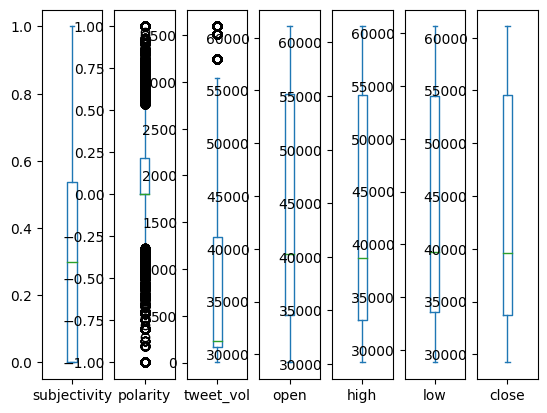

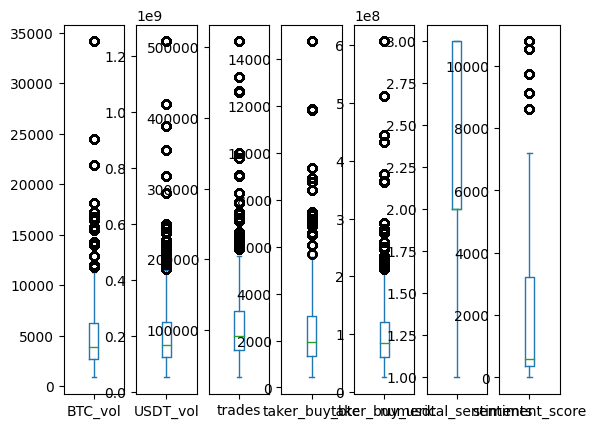

In [96]:
# One boxplot for each variable
num_vars = df_all.select_dtypes(include="float64")
half = np.ceil(num_vars.shape[1] / 2).astype(int)  # splits the plots into two rows
num_vars.iloc[:, 0:half].plot(kind = 'box', subplots=True);
num_vars.iloc[:, half:num_vars.shape[1]].plot(kind = 'box', subplots=True);

 - #### Top 10 values of variables:

In [787]:
# Top 10 BTC Volume
top_btc_vol = df_all.BTC_vol.sort_values(ascending=False).drop_duplicates().head(10)
top_btc_vol

45936     34147.483623
155497    24477.792792
184655    21921.236457
37689     18167.951563
39753     17235.332434
35809     16742.214862
42567     16509.394780
122500    15734.664630
100250    15482.244353
24483     14307.994126
Name: BTC_vol, dtype: float64

In [788]:
# Top 10 Subjectivity Scores
top_sub = df_all.subjectivity.sort_values(ascending=False).drop_duplicates().head(10)
top_sub


4638      1.000000
97252     0.987500
17187     0.983333
17728     0.975000
99066     0.969697
44315     0.966667
175600    0.962963
76695     0.958333
47442     0.950000
127171    0.950000
Name: subjectivity, dtype: float64

In [792]:
# Top 10 Polarity Scores
top_pol = df_all.polarity.sort_values(ascending=False).drop_duplicates().head(10)
top_pol

52690     1.000000
69348     0.966667
123244    0.950000
64346     0.933333
160367    0.925000
14894     0.920000
13274     0.916667
97804     0.900000
118058    0.900000
140094    0.875000
Name: polarity, dtype: float64

In [10]:
# Top 10 Tweet Volumes
top_tweet = df_all.tweet_vol.sort_values(ascending=False).drop_duplicates().head(10)
top_tweet


50336    3594
55432    3517
48025    3243
44229    3040
42409    2866
9033     2311
6793     2225
38938    2116
37238    2084
4608     1948
Name: tweet_vol, dtype: int64

In [98]:
df_all.head(2)

,date,normalized_tokens,subjectivity,polarity,sentiments,tweet_vol,OpenTime,open,high,low,close,BTC_vol,CloseTime,USDT_vol,trades,taker_buy_btc,taker_buy_usdt,close_time,numerical_sentiments,sentiment_score
datetime,,,,,,,,,,,,,,,,,,,,
2021-06-23 19:00:00,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive,811.0,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972.0,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0
2021-06-23 19:00:00,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive,811.0,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972.0,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0


In [26]:
final_df = df_all.copy()
final_df.head()

,date,normalized_tokens,subjectivity,polarity,sentiments,tweet_vol,OpenTime,open,high,low,close,BTC_vol,CloseTime,USDT_vol,trades,taker_buy_btc,taker_buy_usdt,close_time,numerical_sentiments,sentiment_score
datetime,,,,,,,,,,,,,,,,,,,,
2021-06-23 19:00:00,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive,811.0,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972.0,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0
2021-06-23 19:00:00,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive,811.0,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972.0,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0
2021-06-23 19:00:00,2021-06-23 19:29:33,official eshop airdrop missed meme token rally...,0.000000,0.000000,Neutral,811.0,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972.0,2760.026436,9.284151e+07,2021-06-23 19:00:00,2.0,1622.0
2021-06-23 19:00:00,2021-06-23 19:29:31,exactly bitcoin welcome,0.575000,0.525000,Positive,811.0,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972.0,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0
2021-06-23 19:00:00,2021-06-23 19:29:21,true degenerate miss rip bitcoin,0.650000,0.350000,Positive,811.0,2021-06-23 19:00:00,33490.14,33947.17,33211.0,33685.3,5430.388276,2021-06-23 19:59:59.999000,1.826083e+08,100972.0,2760.026436,9.284151e+07,2021-06-23 19:00:00,3.0,2433.0


In [27]:
final_df_grouped = final_df.groupby('datetime').mean()

final_df_grouped.head(2)

,subjectivity,polarity,tweet_vol,open,high,low,close,BTC_vol,USDT_vol,trades,taker_buy_btc,taker_buy_usdt,numerical_sentiments,sentiment_score
datetime,,,,,,,,,,,,,,
2021-02-05 10:00:00,0.131667,0.095000,10.0,37374.39,37727.22,37374.38,37653.98,2722.549399,1.022589e+08,74145.0,1405.514379,5.278994e+07,2.200000,22.0
2021-02-05 11:00:00,0.255115,0.064736,85.0,37659.64,37800.00,37392.71,37705.27,3404.586859,1.280516e+08,85797.0,1728.196225,6.500858e+07,2.223529,189.0


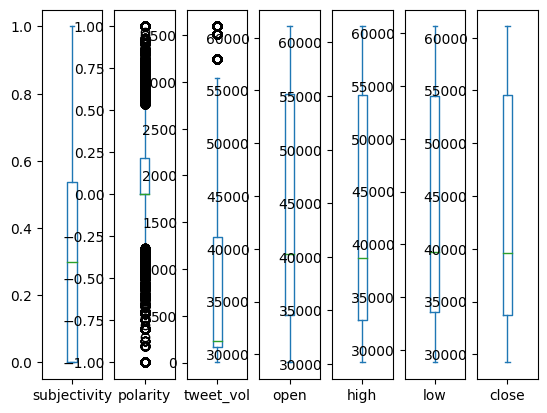

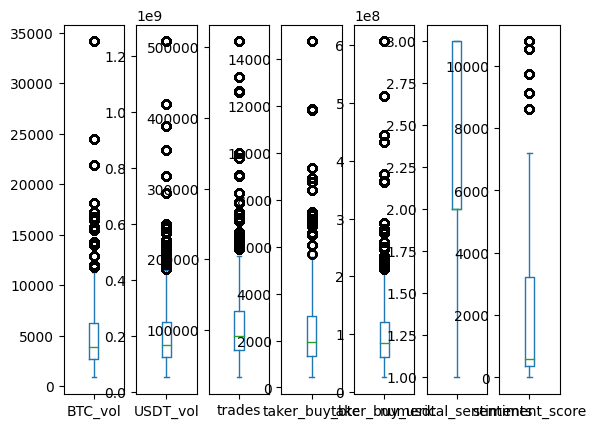

In [11]:
# One boxplot for each variable again for Date grouped data
num_vars = df_all.select_dtypes(include="float64")
half = np.ceil(num_vars.shape[1] / 2).astype(int)  # splits the plots into two rows
num_vars.iloc[:, 0:half].plot(kind = 'box', subplots=True);
num_vars.iloc[:, half:num_vars.shape[1]].plot(kind = 'box', subplots=True);

- ### handling outliers:

- Detect outliers: 
Outliers detected in BTC Volume ,USDT Volume, Taker Buy BTC and USDT samples hbut they were left as they are becase they can give information about sudden changes movements

In [23]:
outliers = []

def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
BTC_outliers = detect_outliers_zscore(final_df_grouped.BTC_vol)
print("BTC Volume Outliers from Z-scores method: ", BTC_outliers)
USDT_outliers = detect_outliers_zscore(final_df_grouped.USDT_vol)
print("\n USDT Volume Outliers from Z-scores method: ", USDT_outliers)
tb_btc_outliers = detect_outliers_zscore(final_df_grouped.taker_buy_btc)
print("\n Taker Buy BTC Outliers from Z-scores method: ", tb_btc_outliers)
tb_usdt_outliers = detect_outliers_zscore(final_df_grouped.taker_buy_usdt)
print("\n Taker Buy USDT Outliers from Z-scores method: ", tb_usdt_outliers)

BTC Volume Outliers from Z-scores method:  [13971.32848, 21921.236457, 24477.792792, 15734.664629999997, 12867.051881999998, 15482.244353, 34147.483623, 16509.39478, 17235.332434, 18167.951563, 16742.214862, 14307.994126]

 USDT Volume Outliers from Z-scores method:  [13971.32848, 21921.236457, 24477.792792, 15734.664629999997, 12867.051881999998, 15482.244353, 34147.483623, 16509.39478, 17235.332434, 18167.951563, 16742.214862, 14307.994126, 572303859.0916973, 951254145.4221892, 541003873.923485, 524402408.5935544, 585168995.1497669, 1252120246.3173802, 588440597.7115232, 711859089.9766872, 864567947.1705338, 708630386.8457215, 600681216.084953, 771280685.5465064, 1028499500.1229572, 566949749.5934684, 539604208.8636954]

 Taker Buy BTC Outliers from Z-scores method:  [13971.32848, 21921.236457, 24477.792792, 15734.664629999997, 12867.051881999998, 15482.244353, 34147.483623, 16509.39478, 17235.332434, 18167.951563, 16742.214862, 14307.994126, 572303859.0916973, 951254145.4221892, 541

In [28]:
final_df_grouped.to_csv(file+'sentiments_final_grouped_df_btc.csv', index=True, index_label='datetime')


# Analysis

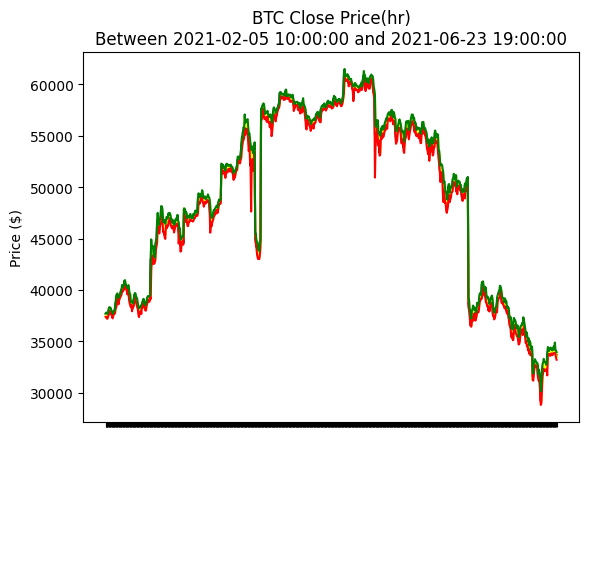

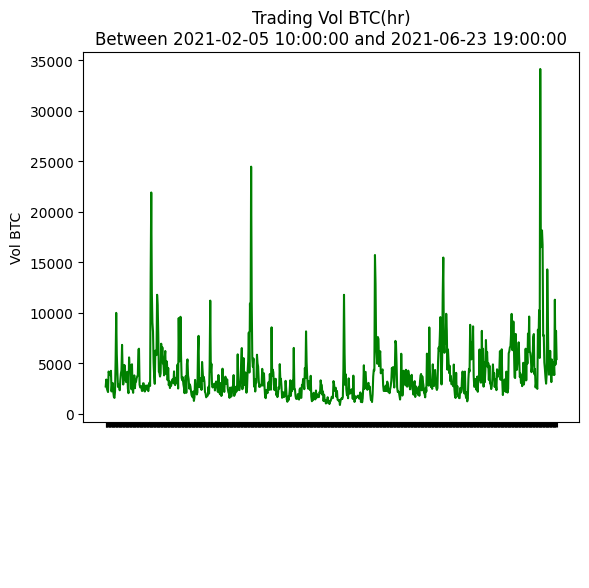

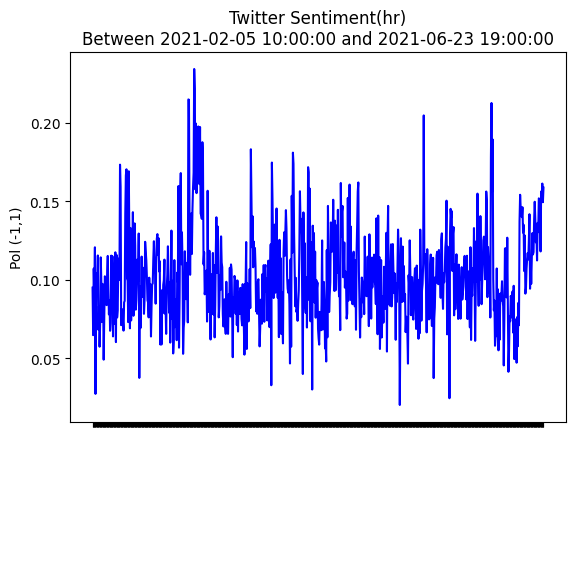

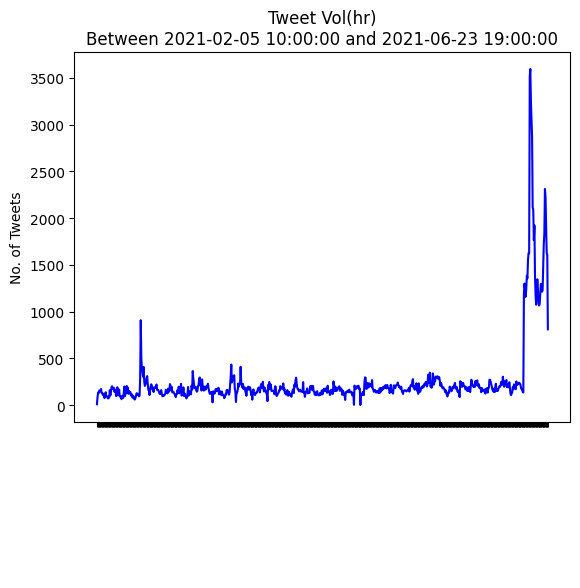

In [49]:
plt.plot(final_df_grouped.index, final_df_grouped['close'], 'black')
plt.plot(final_df_grouped.index, final_df_grouped['open'], 'yellow')
plt.plot(final_df_grouped.index, final_df_grouped['low'], 'red')
plt.plot(final_df_grouped.index, final_df_grouped['high'], 'green')
plt.title('BTC Close Price(hr)\n' + f"Between {final_df_grouped.index[0]} and {final_df_grouped.index[-1]}" )
plt.xticks(rotation='vertical',  color='w')
plt.ylabel('Price ($)');
plt.show();


plt.plot(final_df_grouped.index, final_df_grouped['BTC_vol'], 'g')
plt.title('Trading Vol BTC(hr)\n' + f"Between {final_df_grouped.index[0]} and {final_df_grouped.index[-1]}")
plt.xticks(rotation='vertical', color='w')
plt.ylabel('Vol BTC');
plt.show();

plt.plot(final_df_grouped.index, final_df_grouped['polarity'], 'b')
plt.xticks()
plt.xticks(rotation='vertical', color='w')
plt.title('Twitter Sentiment(hr)\n' + f"Between {final_df_grouped.index[0]} and {final_df_grouped.index[-1]}")
plt.ylabel('Pol (-1,1)');
plt.show();
#plt.legend()

plt.plot(final_df_grouped.index, final_df_grouped['tweet_vol'], 'b')
plt.xticks(rotation='vertical',  color='w')
plt.title('Tweet Vol(hr)\n' + f"Between {final_df_grouped.index[0]} and {final_df_grouped.index[-1]}")
plt.ylabel('No. of Tweets');
plt.show();


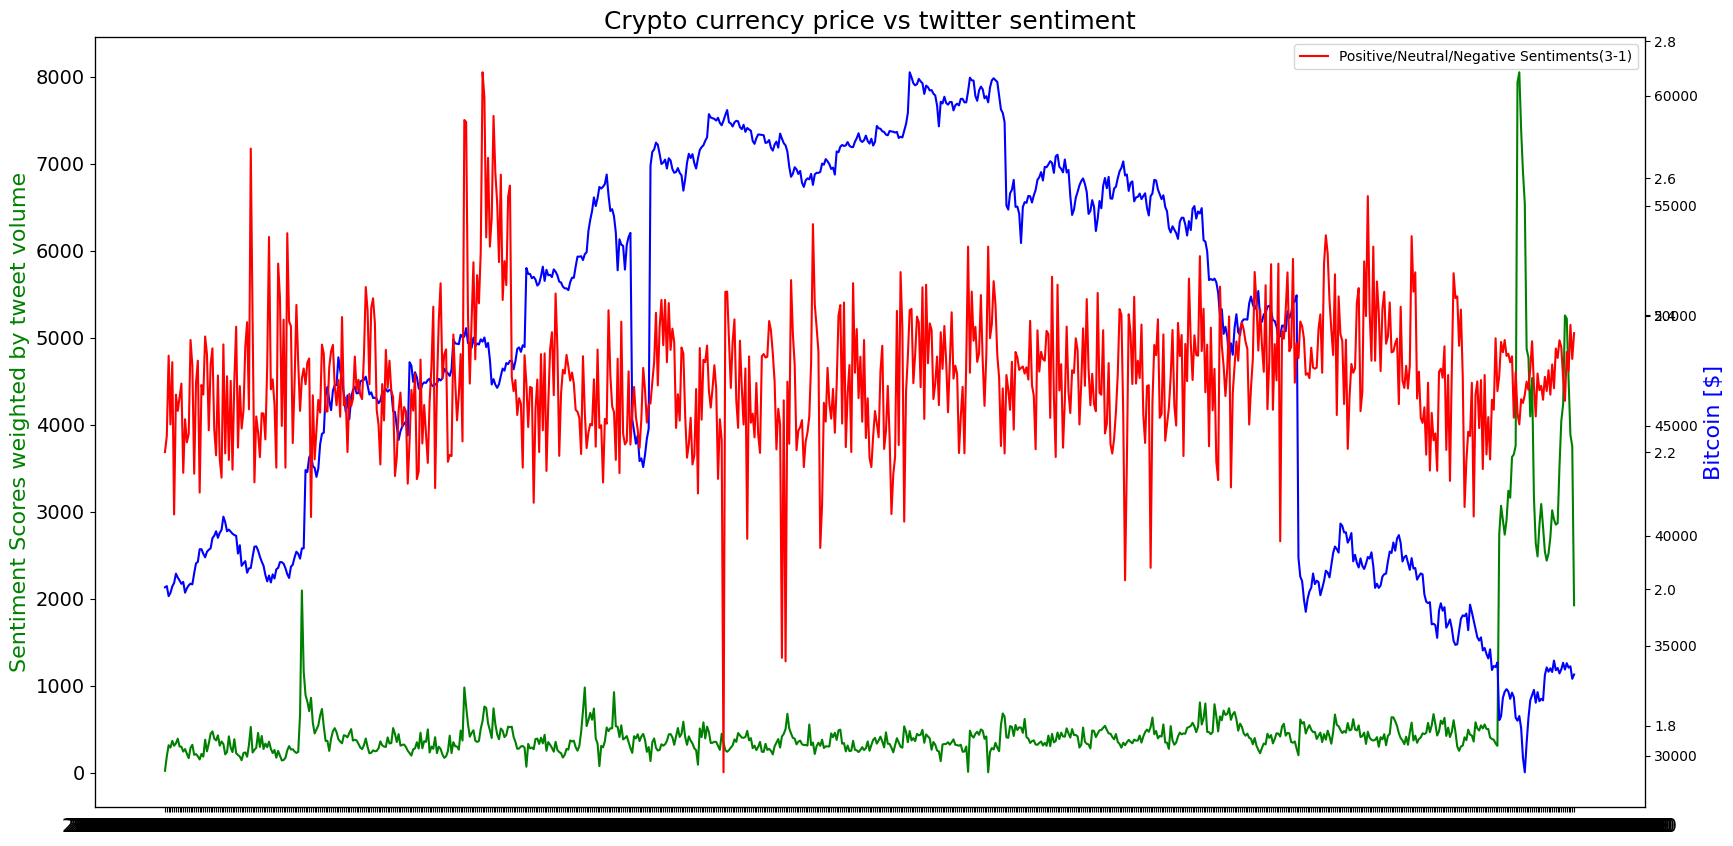

In [20]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency price vs twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax1.plot(final_df_grouped.index, final_df_grouped['sentiment_score'], 'g-', label = 'Sentiment Score')
ax2.plot(final_df_grouped.index, final_df_grouped['close'], 'b-', label = ' BTC Close Price')
ax3.plot(final_df_grouped.index, final_df_grouped['numerical_sentiments'], 'r-', label = 'Positive/Neutral/Negative Sentiments(3-1)')

ax1.set_ylabel("Sentiment Scores weighted by tweet volume", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin [$]", color='b', fontsize=16)
plt.legend()
plt.show()


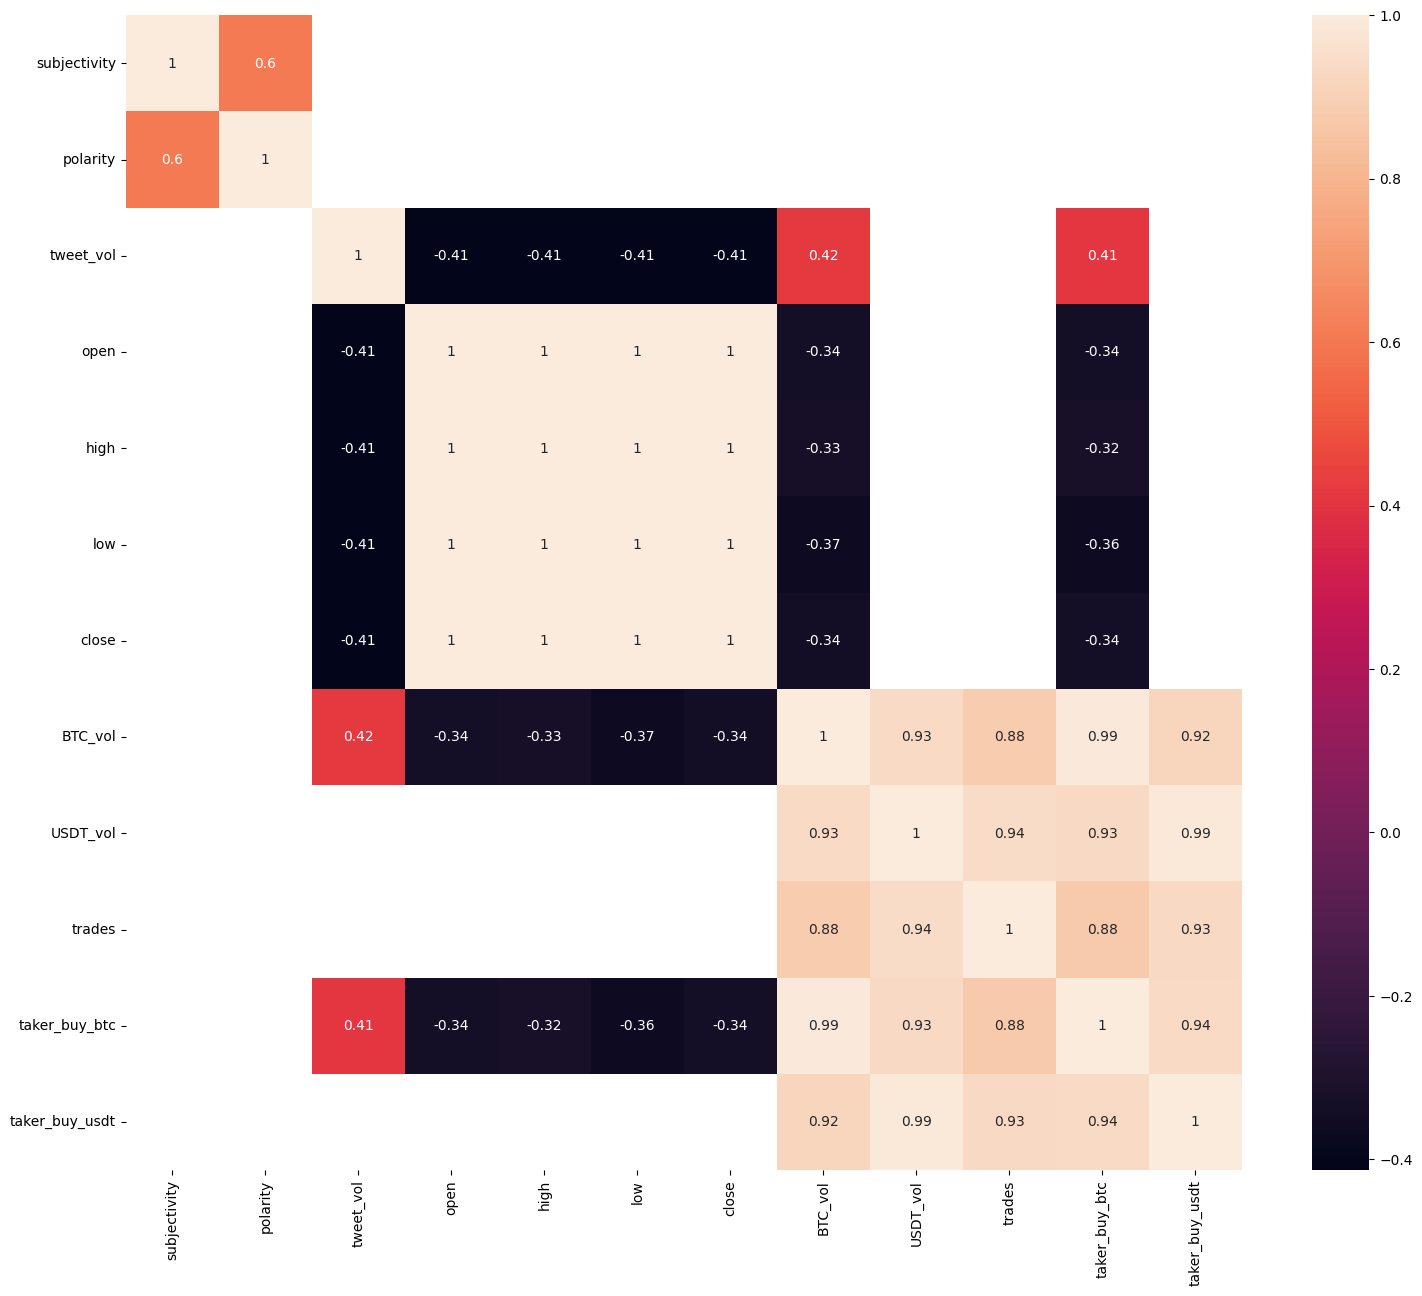

In [53]:
f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],
            annot=True);

In [29]:
final_df_grouped.head(2)

,subjectivity,polarity,tweet_vol,open,high,low,close,BTC_vol,USDT_vol,trades,taker_buy_btc,taker_buy_usdt,numerical_sentiments,sentiment_score
datetime,,,,,,,,,,,,,,
2021-02-05 10:00:00,0.131667,0.095000,10.0,37374.39,37727.22,37374.38,37653.98,2722.549399,1.022589e+08,74145.0,1405.514379,5.278994e+07,2.200000,22.0
2021-02-05 11:00:00,0.255115,0.064736,85.0,37659.64,37800.00,37392.71,37705.27,3404.586859,1.280516e+08,85797.0,1728.196225,6.500858e+07,2.223529,189.0


# Feature Importance & Selection

Numerical Input, Numerical Output:
This is a regression predictive modeling problem with numerical input variables.

Techniques for correlation coefficient;
- Pearson’s for a linear correlation :
assumes a Gaussian probability distribution to the observations and a linear relationship.
- rank-based methods for a nonlinear correlation.
- Spearman’s rank coefficient (nonlinear)

Pearson’s correlation coefficient (linear).

Pearson’s Correlation Coefficient: f_regression()


You can transform the data to meet the expectations of the test and try the test regardless of the expectations and compare results.


In [30]:
#load necessary libraries

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


In [30]:
df = final_df_grouped.copy()
df= df[['subjectivity', 'polarity', 'tweet_vol','BTC_vol', 'USDT_vol', 'trades', 'taker_buy_btc', 'taker_buy_usdt',
       'numerical_sentiments', 'sentiment_score','close']]
df.head()

,subjectivity,polarity,tweet_vol,BTC_vol,USDT_vol,trades,taker_buy_btc,taker_buy_usdt,numerical_sentiments,sentiment_score,close
datetime,,,,,,,,,,,
2021-02-05 10:00:00,0.131667,0.095000,10.0,2722.549399,1.022589e+08,74145.0,1405.514379,5.278994e+07,2.200000,22.0,37653.98
2021-02-05 11:00:00,0.255115,0.064736,85.0,3404.586859,1.280516e+08,85797.0,1728.196225,6.500858e+07,2.223529,189.0,37705.27
2021-02-05 12:00:00,0.284652,0.107199,135.0,2526.099044,9.484751e+07,70845.0,1167.101098,4.383563e+07,2.340741,316.0,37251.07
2021-02-05 13:00:00,0.252204,0.090313,129.0,2315.261816,8.673690e+07,70360.0,1122.581344,4.205791e+07,2.240310,289.0,37395.91
2021-02-05 14:00:00,0.290694,0.120740,157.0,2165.149463,8.140203e+07,63507.0,1010.101639,3.797203e+07,2.331210,366.0,37691.32


In [32]:
#Prepare data:
    #filter out our target variable from the rest
    #Split data for funtions

X = df[[val for val in df.columns if val != 'close']]
y = df['close']

- #If necessary#\
#To scale the values of data frame\
scaler = MinMaxScaler(feature_range=(0, 1))\
scale_feature = scaler.fit_transform(df.values)\
scale_feature.shape

###  - Using SelectKBest With Regression To Select Best Features:

In [33]:
#load necessary libraries for regression
# pearson's correlation feature selection for numeric input and numeric output

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

In [34]:

def feature_selection(X, y, criteria, k):
    
    """ this function will take in X, y variables with criteria, 
    and return a dataframe with most important columns based on 
    that criteria"""

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(X,y)
    
    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(X)

    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]

    # return that dataframe
    return X

New_X_mut_reg = feature_selection(X, y, mutual_info_regression, 6)

# took peakrpm over stroke
New_X_f_reg = feature_selection(X, y, f_regression, 6)


print ("Mutual_info_regression only kept these 6 columns :\n", list(New_X_mut_reg.columns))
print ("\n\n F_regression only kept these 6 columns :\n", list(New_X_f_reg.columns))

Mutual_info_regression only kept these 6 columns :
 ['subjectivity', 'tweet_vol', 'BTC_vol', 'trades', 'taker_buy_btc', 'sentiment_score']


 F_regression only kept these 6 columns :
 ['tweet_vol', 'BTC_vol', 'USDT_vol', 'trades', 'taker_buy_btc', 'sentiment_score']


### - Random forest Importance
RF models are reliable
predictors for high-dimensional and small-sample data. The success percentage of studies
conducted on Twitter heavily depends on the correctness of the data
Once we have the importance of each feature, we perform feature selection using a procedure called Recursive Feature Elimination

Random Forest is a supervised model that implements both decision trees and bagging method. The idea is that the training dataset is resampled according to a procedure called “bootstrap”. Each sample contains a random subset of the original columns and is used to fit a decision tree. 
Finally, the predictions of the trees are mixed together calculating the mean value (for regression) or using soft voting (for classification).

- Further Studies:\
    The number of models and the number of columns are hyperparameters to be optimized\
    Feature Importance of Lag Variables


[0.01678234 0.00765288 0.10636342 0.22136424 0.15249569 0.01559419
 0.19022403 0.1934604  0.00592072 0.09014207]


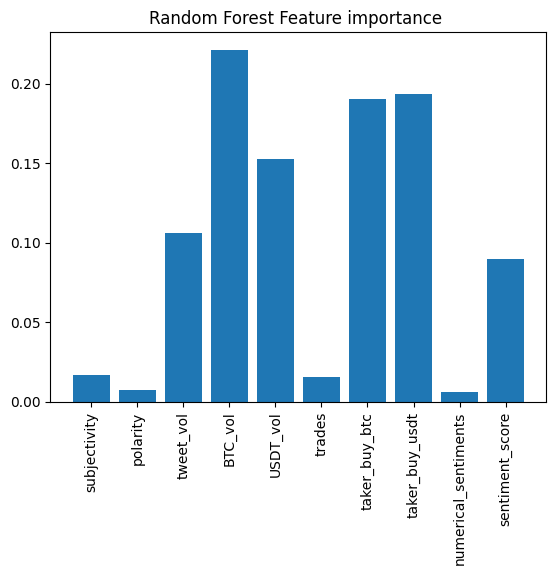

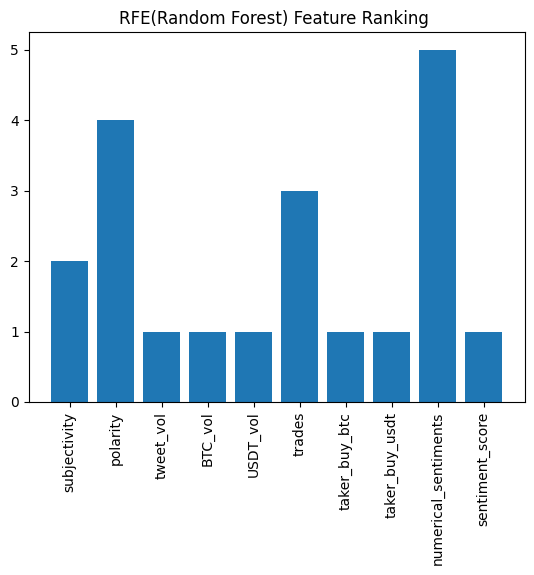

Selected Features:
tweet_vol
BTC_vol
USDT_vol
taker_buy_btc
taker_buy_usdt
sentiment_score


In [35]:
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from matplotlib import pyplot
# load data


array = df.values

# Dataframe : split into input and output
X = array[:,0:-1]
y = array[:,-1]

# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = df.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names,rotation='vertical')
plt.title('Random Forest Feature importance ')
pyplot.show()


# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=6)
fit = rfe.fit(X, y)
# report selected features
# report selected features

# plot feature rank
names = df.columns.values[0:-1]
ticks_rfe = [i for i in range(len(names))]
pyplot.bar(ticks_rfe, fit.ranking_)
pyplot.xticks(ticks_rfe, names, rotation = 'vertical')
plt.title('RFE(Random Forest) Feature Ranking ')
pyplot.show()

print('Selected Features:')
names = df.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

### - Feature selection summary:


In [36]:
print ("Mutual_info_regression only kept these 6 columns :\n", list(New_X_mut_reg.columns))
print("-------------------------------------------------------------------------------------")
print ("F_regression only kept these 6 columns :\n", list(New_X_f_reg.columns))
print("-------------------------------------------------------------------------------------")
print ('Random Forest Feature Importance : \n')
names = df.columns.values[0:-1]
ticks = [i for i in range(len(names))]
for i in range(len(names)):
    print(names[i]," : %.3f " % model.feature_importances_[i])
print("-------------------------------------------------------------------------------------")
print('\n RFE(Random Forest ) Selected Features: \n')
names = df.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

Mutual_info_regression only kept these 6 columns :
 ['subjectivity', 'tweet_vol', 'BTC_vol', 'trades', 'taker_buy_btc', 'sentiment_score']
-------------------------------------------------------------------------------------
F_regression only kept these 6 columns :
 ['tweet_vol', 'BTC_vol', 'USDT_vol', 'trades', 'taker_buy_btc', 'sentiment_score']
-------------------------------------------------------------------------------------
Random Forest Feature Importance : 

subjectivity  : 0.017 
polarity  : 0.008 
tweet_vol  : 0.106 
BTC_vol  : 0.221 
USDT_vol  : 0.152 
trades  : 0.016 
taker_buy_btc  : 0.190 
taker_buy_usdt  : 0.193 
numerical_sentiments  : 0.006 
sentiment_score  : 0.090 
-------------------------------------------------------------------------------------

 RFE(Random Forest ) Selected Features: 

tweet_vol
BTC_vol
USDT_vol
taker_buy_btc
taker_buy_usdt
sentiment_score


**Result:** Columns below are decided to keep for further analysis
['tweet_vol', 'BTC_vol',USDT_vol,'trades', 'taker_buy_btc', 'taker_buy_usdt','sentiment_score', 'close' ]


### ---------------------------------------------------------------------------------------------------------------------------------


In [38]:
df.columns

Index(['subjectivity', 'polarity', 'tweet_vol', 'BTC_vol', 'USDT_vol',
       'trades', 'taker_buy_btc', 'taker_buy_usdt', 'numerical_sentiments',
       'sentiment_score', 'close'],
      dtype='object')

## Model Development:

In [40]:
df = df[['tweet_vol', 'BTC_vol','USDT_vol','trades', 'taker_buy_btc', 'taker_buy_usdt','sentiment_score', 'close']]

In [41]:
df.head()

,tweet_vol,BTC_vol,USDT_vol,trades,taker_buy_btc,taker_buy_usdt,sentiment_score,close
datetime,,,,,,,,
2021-02-05 10:00:00,10.0,2722.549399,1.022589e+08,74145.0,1405.514379,5.278994e+07,22.0,37653.98
2021-02-05 11:00:00,85.0,3404.586859,1.280516e+08,85797.0,1728.196225,6.500858e+07,189.0,37705.27
2021-02-05 12:00:00,135.0,2526.099044,9.484751e+07,70845.0,1167.101098,4.383563e+07,316.0,37251.07
2021-02-05 13:00:00,129.0,2315.261816,8.673690e+07,70360.0,1122.581344,4.205791e+07,289.0,37395.91
2021-02-05 14:00:00,157.0,2165.149463,8.140203e+07,63507.0,1010.101639,3.797203e+07,366.0,37691.32


In [46]:
df.index = pd.to_datetime(df.index)

In [49]:
df.sort_index(inplace=True)
df.head()

,tweet_vol,BTC_vol,USDT_vol,trades,taker_buy_btc,taker_buy_usdt,sentiment_score,close
datetime,,,,,,,,
2021-02-05 10:00:00,10.0,2722.549399,1.022589e+08,74145.0,1405.514379,5.278994e+07,22.0,37653.98
2021-02-05 11:00:00,85.0,3404.586859,1.280516e+08,85797.0,1728.196225,6.500858e+07,189.0,37705.27
2021-02-05 12:00:00,135.0,2526.099044,9.484751e+07,70845.0,1167.101098,4.383563e+07,316.0,37251.07
2021-02-05 13:00:00,129.0,2315.261816,8.673690e+07,70360.0,1122.581344,4.205791e+07,289.0,37395.91
2021-02-05 14:00:00,157.0,2165.149463,8.140203e+07,63507.0,1010.101639,3.797203e+07,366.0,37691.32


## Data Preperation:

In [50]:
# Import library
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 3)

# Split data
X = df.drop('close', axis=1)
y = df['close']

X2 = df.drop(['tweet_vol', 'BTC_vol', 'USDT_vol', 'trades', 'taker_buy_btc',
       'taker_buy_usdt'], axis=1)
y2 = df['close']

#the time series split ensures the test datasets are younger or later than train datasets, 
# which is more realistic since we will not be able to train on “future” data. 
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
for train_index, test_index in tss.split(X):
    X2_train, X2_test = X2.iloc[train_index, :], X2.iloc[test_index,:]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]
    
df_x_train = X_train.copy()
df_x_test = X_test.copy()
df_y_train = y_train.copy()
df_y_test= y_test.copy()

print("Dataset1: ", X_train.shape, X_test.shape,y_train.shape,y_test.shape,)
print("Dataset2 : ", X2_train.shape, X2_test.shape,y2_train.shape,y2_test.shape,)

Dataset1:  (580, 7) (193, 7) (580,) (193,)
Dataset2 :  (580, 2) (193, 2) (580,) (193,)


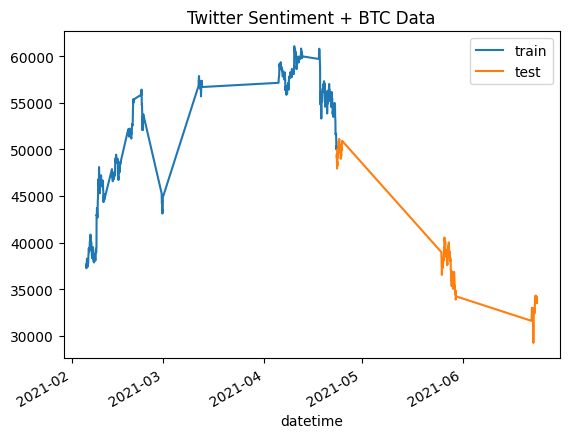

In [51]:
plt.title('Twitter Sentiment + BTC Data')
y_train.plot(label = 'train')
y_test.plot(label = 'test')
plt.legend()

### Random Forest
it has lower variance than the other machine learning algorithms and it can produce better results.

In [52]:
# Import package
from sklearn.ensemble import RandomForestRegressor

# Define model
model1 = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train model
history1 = model1.fit(X_train, y_train)

# Make predictions
y_hat = history.predict(X_test)

NameError: name 'history' is not defined

In [ ]:
# Show initial actual and predicted values
results = pd.DataFrame({'actual': y_test, 'predicted': y_hat}).head()

print("Random Forest")
print(results.to_string(index=False))

# Calculate RMSE
rmse_rf = mean_squared_error(y_test, y_hat, squared=False)
print("RMSE:", rmse_rf)



predictions = y_hat
errors = abs(predictions - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

In [ ]:
# Import package
from sklearn.ensemble import RandomForestRegressor

# Define model
model2 = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train model
history2 = model2.fit(X2_train, y2_train)

# Make predictions
y_hat2 = model2.predict(X2_test)

In [ ]:
# Show initial actual and predicted values
results2 = pd.DataFrame({'actual': y2_test, 'predicted': y_hat2}).head()

print("Random Forest")
print(results2.to_string(index=False))

# Calculate RMSE
rmse2 = mean_squared_error(y2_test, y_hat2, squared=False)
print("RMSE:", rmse2)

predictions = y_hat2
errors = abs(predictions - y2_test)
mape = 100 * np.mean(errors / y2_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))


** Model fittet better with only "sentiment scores". independent variables are highly correlated, so the number of features decreased.Model will be developed on second dataset**

# Cross Validation

In [53]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(model.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


### Random Search For Cross Validation

In [54]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model = RandomForestRegressor(random_state=42)
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [55]:
# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [56]:
rf_random_best_params = rf_random.best_params_
rf_random_best_params

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [57]:
best_random = rf_random.best_estimator_
predictions = best_random.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Random Search Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Random Search Model Performance
Average Error: 4759.4116 degrees.
Accuracy = 86.61%.


## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [110,120,130,140],
    'max_features': [2,3],
    'min_samples_leaf': [1,2],
    'min_samples_split': [2,3],
    'n_estimators': [800, 1000, 1200,3000]
}

# Create a base model
model = RandomForestRegressor(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

In [ ]:
best_grid = grid_search.best_estimator_
predictions = best_grid.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Grid Search Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

## Model Comparison:

In [ ]:
def model_evaluation(model,X_test,y_test):
    y_hat = model.predict(X_test)
    errors = abs(y_hat - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    rmse2 = mean_squared_error(y_test, y_hat, squared=False)
    print("RMSE:", rmse2)
    
    return accuracy
    

In [ ]:
# Full Data - RFG Basic Model
model1 = RandomForestRegressor(n_estimators=1000)
model1.fit(X_train,y_train)
simple_RFG_accuracy = model_evaluation(model1, X_test,y_test)

In [ ]:
# Full Data - RFG Basic Model with Random search best params
model2 = RandomForestRegressor(**rf_random_best_params)
model2.fit(X_train,y_train)
RFG_RB_accuracy = model_evaluation(model2, X_test,y_test)

In [ ]:
# Full Data - RFG Basic Model + Random search best params + Grid Search Best Params
model3 = RandomForestRegressor(**grid_best_params)
model2.fit(X_train,y_train)
RFG_GS_accuracy = model_evaluation(model2, X_test,y_test)

In [ ]:
# Single Feature data - RFG Basic Model

model4 = RandomForestRegressor(n_estimators=1000)
model4.fit(X2_train,y2_train)
simple_RFG_accuracy2 = model_evaluation(model4, X2_test,y2_test)

In [ ]:
# Single Feature data - RFG Basic Model with Random search best params

model5 = RandomForestRegressor(**rf_random_best_params)
model5.fit(X2_train,y2_train)
RFG_RB_accuracy2 = model_evaluation(model5, X2_test,y2_test)

In [ ]:
# Single Feature data - RFG Basic Model with Random search best params

model6 = RandomForestRegressor(**grid_best_params)
model6.fit(X2_train,y2_train)
RFG_GS_accuracy2 = model_evaluation(model6, X2_test,y2_test)

In [ ]:
df= [simple_RFG_accuracy, RFG_RB_accuracy, RFG_GS_accuracy,simple_RFG_accuracy2, RFG_RB_accuracy2, RFG_GS_accuracy2 ]

In [ ]:
df = pd.DataFrame(df)
df.columns = ['%Accuracy']
df.index = ["Full data simple RFG", "Full data RFG + RB", "Full data RFG+RB+GS","Single Feature RFG", "Single FEature RFG+RB", "Full data RFG+RB+GS "]
df.head()